Hand segmentaion with optic flow
===

In [2]:
# Imports
from IPython.display import Video
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time


### Capture video from laptop webcam
---

In [3]:
# import numpy as np
# import cv2

# cap = cv2.VideoCapture(0)

# # Define the codec and create VideoWriter object
# #fourcc = cv2.cv.CV_FOURCC(*'DIVX')
# #out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
# out = cv2.VideoWriter('output.mp4', -1, 20.0, (640,480))

# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if ret==True:

#         # write the flipped frame
#         out.write(frame)

#         cv2.imshow('frame',frame)
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
#     else:
#         break

# # Release everything if job is finished
# cap.release()
# out.release()
# cv2.destroyAllWindows()


### Run video
--- 

In [4]:
from IPython.display import Video

Video("output.mp4")

## Preview frames
---

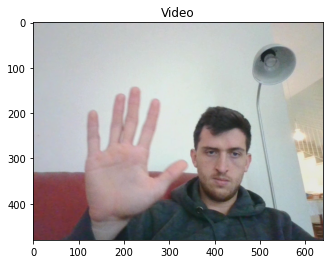

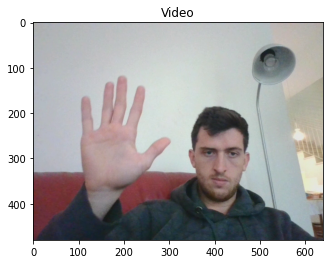

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time

myFrameNumber = 50
cap = cv2.VideoCapture("output.mp4")

# get total number of frames
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

# check for valid frame number
if myFrameNumber >= 0 & myFrameNumber <= totalFrames:
    # set frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES,myFrameNumber)

ret, frame = cap.read()

def show_img_in_notebook(frame):
    RGB_im = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
    plt.imshow(RGB_im)
    plt.title("Video")
    plt.show()
    
show_img_in_notebook(frame)

cap.set(cv2.CAP_PROP_POS_FRAMES,myFrameNumber + 30)
ret, frame = cap.read()

show_img_in_notebook(frame)


## Calculate dense optical flow matrix
---

In [6]:
def calculate_optical_flow_matrix(video_path: str):

    cap = cv2.VideoCapture(video_path)
    
    # get total number of frames
    totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    
    w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    
    video_flow = np.zeros((int(h), int(w), 2, int(totalFrames)-1))
    
    suc, prev = cap.read()
    prevgray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
    
    for image in range(int(totalFrames) - 1):

        suc, img = cap.read()
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # start time to calculate FPS
        start = time.time()

        flow = cv2.calcOpticalFlowFarneback(prevgray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        video_flow[...,image] = flow
        
        prevgray = gray

        # End time
        end = time.time()
        # calculate the FPS for current frame detection
        fps = 1 / (end - start)

        print(f"{fps:.2f} FPS")
        
        # cv2.imshow('flow', func(gray, flow))
        # cv2.imshow('flow HSV', draw_hsv(flow))
        # cv2.imshow('contour', draw_contour(gray,flow)
        
    cap.release()
    return video_flow

video_flow = calculate_optical_flow_matrix("output.mp4")

3.44 FPS
7.06 FPS
7.33 FPS
7.43 FPS
6.55 FPS
5.31 FPS
4.38 FPS
3.89 FPS
3.98 FPS
4.80 FPS
5.07 FPS
5.70 FPS
5.73 FPS
5.86 FPS
6.60 FPS
6.60 FPS
5.97 FPS
5.06 FPS
5.46 FPS
6.87 FPS
7.21 FPS
7.59 FPS
7.17 FPS
7.27 FPS
7.01 FPS
6.91 FPS
7.95 FPS
8.29 FPS
8.29 FPS
8.53 FPS
8.72 FPS
8.79 FPS
8.87 FPS
8.95 FPS
8.94 FPS
9.07 FPS
8.79 FPS
8.80 FPS
9.03 FPS
8.64 FPS
9.37 FPS
8.72 FPS
8.87 FPS
8.64 FPS
8.50 FPS
8.46 FPS
8.95 FPS
8.95 FPS
9.37 FPS
8.77 FPS
8.68 FPS
7.83 FPS
8.57 FPS
8.87 FPS
8.96 FPS
7.90 FPS
7.48 FPS
7.16 FPS
6.19 FPS
6.08 FPS
7.21 FPS
8.17 FPS
7.74 FPS
7.65 FPS
7.48 FPS
7.71 FPS
8.02 FPS
8.43 FPS
8.50 FPS
8.57 FPS
8.11 FPS
8.42 FPS
8.08 FPS
7.98 FPS
8.15 FPS
8.09 FPS
8.58 FPS
7.70 FPS
7.48 FPS
8.36 FPS
8.49 FPS
8.87 FPS
8.80 FPS
8.87 FPS
8.02 FPS
8.15 FPS
8.54 FPS
8.79 FPS
8.79 FPS
9.03 FPS
8.60 FPS
9.03 FPS
8.87 FPS
8.72 FPS
8.80 FPS
8.02 FPS
6.43 FPS
3.89 FPS
5.55 FPS
3.56 FPS
4.15 FPS
4.62 FPS
5.88 FPS
6.96 FPS
3.77 FPS
3.06 FPS
2.46 FPS
2.95 FPS
3.47 FPS
4.29 FPS
5.51 FPS
5

## Preview optical flow upon video
---

In [7]:
def draw_flow(img, flow, step=16):

    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
    fx, fy = flow[y,x].T

    lines = np.vstack([x, y, x-fx, y-fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)

    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(img_bgr, lines, 0, (0, 255, 0))

    for (x1, y1), (_x2, _y2) in lines:
        cv2.circle(img_bgr, (x1, y1), 1, (0, 255, 0), -1)

    return img_bgr

def preview_video_with_costume_func(func, input_video_path: str, output_video_path: str):
    cap = cv2.VideoCapture(input_video_path)
    out = cv2.VideoWriter(output_video_path, -1, 20.0, (640,480))
    # get total number of frames
    totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

    suc, prev = cap.read()
    prevgray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)

    for image in range(int(totalFrames) - 1):

        suc, img = cap.read()
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        out.write(func(gray, video_flow[...,image], step=16))
        prevgray = gray

        
    cap.release()
    out.release()


preview_video_with_costume_func(draw_flow, 'output.mp4', 'output_flow.mp4')
Video('output_flow.mp4')

## Hand segmentaion Take 1
---
The first try was only with filtering by the value of the gradient of each pixel that was calculated with the optical flow algorithem.   
The problem was that when we don't move the hand, our data dissapper.   
So next step is find a convex around the hand a change it only by the center of mass.

In [31]:
def draw_contour_1(img,flow, step=16):
    
    h, w = flow.shape[:2]
    fx, fy = flow[:,:,0], flow[:,:,1]

    v = np.sqrt(fx*fx+fy*fy)

    contour = np.zeros((h, w, 1), np.uint8)

    contour[v > 3] = 255
    
    blurred = cv2.GaussianBlur(contour, (5, 5), cv2.BORDER_DEFAULT)
    
    img_bgr = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)

    return img_bgr

preview_video_with_costume_func(draw_contour_1, 'output.mp4', 'output_contour_1.mp4')
Video('output_contour_1.mp4')

## Hand segmentaion Take 2
---
This time the we didn

In [40]:
def draw_contour_2(img,flow, step=16):
    try:
        h, w = flow.shape[:2]
        fx, fy = flow[:,:,0], flow[:,:,1]

        v = np.sqrt(fx*fx+fy*fy)

        contour = np.zeros((h, w, 1), np.uint8)

        contour[v > 3] = 255
        
        blurred = cv2.GaussianBlur(contour, (5, 5), cv2.BORDER_DEFAULT)
        
        # threshold = 80
        # canny_output = cv2.Canny(blurred, threshold, threshold * 2)

        # get the largest contour
        contours = cv2.findContours(blurred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]

        big_contour = max(contours, key=cv2.contourArea)

        M = cv2.moments(big_contour)

        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])

        cv2.circle(img, (cx, cy), 10, (0, 0, 255), -1)
        
        epsilon = 0.1*cv2.arcLength(big_contour,True)
        approx = cv2.approxPolyDP(big_contour,epsilon,True)

        # draw white contour on black background as mask
        mask = np.zeros((h, w), dtype=np.uint8)
        cv2.drawContours(mask, [big_contour], 0, (255, 255, 255), cv2.FILLED)
        
        hull = cv2.convexHull(big_contour)
        cv2.drawContours(img, [hull], -1, (0, 255, 255), 2)
        
        # invert mask so shapes are white on black background
        mask_inv = 255 - mask

        # create new (blue) background
        bckgnd = np.full_like(img, 255)

        # apply mask to image
        image_masked = cv2.bitwise_and(img, img, mask=mask)

        # apply inverse mask to background
        bckgnd_masked = cv2.bitwise_and(bckgnd, bckgnd, mask=mask_inv)

        # add together
        result = cv2.add(image_masked, bckgnd_masked)
    
    except:
        result = blurred
    
    img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    return img_bgr

preview_video_with_costume_func(draw_contour_2, 'output.mp4', 'output_contour_3.mp4')
Video('output_contour_3.mp4')

## Run optic flow algo with costume function live
---

In [23]:
def run_optic_flow_from_web_cam_video(func):

    cap = cv2.VideoCapture(0)

    suc, prev = cap.read()
    prevgray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)


    while True:

        suc, img = cap.read()
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # start time to calculate FPS
        start = time.time()

        flow = cv2.calcOpticalFlowFarneback(prevgray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        
        prevgray = gray

        # End time
        end = time.time()
        # calculate the FPS for current frame detection
        fps = 1 / (end - start)

        print(f"{fps:.2f} FPS")
        
        cv2.imshow('flow', func(gray, flow))
        # cv2.imshow('flow HSV', draw_hsv(flow))
        # cv2.imshow('contour', draw_contour(gray,flow))

        key = cv2.waitKey(5)
        if key == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()
    
run_optic_flow_from_web_cam_video(draw_flow)

8.54 FPS
6.02 FPS
6.38 FPS
6.22 FPS
7.67 FPS
7.90 FPS
8.22 FPS
8.14 FPS
7.91 FPS
8.05 FPS
7.20 FPS
4.88 FPS
5.69 FPS
6.02 FPS
4.70 FPS
5.52 FPS
5.24 FPS
5.84 FPS
6.16 FPS
6.90 FPS
7.18 FPS
7.73 FPS
7.97 FPS
7.53 FPS
7.02 FPS
8.37 FPS
7.94 FPS
8.34 FPS
8.53 FPS
8.54 FPS
8.36 FPS
8.64 FPS
8.72 FPS
8.72 FPS
8.64 FPS
8.94 FPS
8.79 FPS
8.71 FPS
8.57 FPS
8.50 FPS
8.29 FPS
7.06 FPS
7.48 FPS
6.67 FPS
7.48 FPS
7.77 FPS
7.47 FPS
6.55 FPS
6.82 FPS
6.51 FPS
6.75 FPS
6.96 FPS
7.75 FPS
7.77 FPS
8.32 FPS
8.72 FPS
8.02 FPS
8.43 FPS
8.15 FPS
7.71 FPS
8.15 FPS
8.22 FPS
8.49 FPS
8.22 FPS
8.80 FPS
8.72 FPS
8.53 FPS
8.87 FPS
8.87 FPS
8.34 FPS
8.87 FPS
8.87 FPS
9.19 FPS
8.87 FPS
7.71 FPS
7.60 FPS
7.11 FPS
6.31 FPS
8.42 FPS
8.28 FPS
7.40 FPS
7.09 FPS
6.73 FPS
7.61 FPS
7.73 FPS
8.46 FPS
8.57 FPS
8.64 FPS
8.88 FPS
8.99 FPS
8.95 FPS
8.22 FPS
9.37 FPS
9.28 FPS
9.12 FPS
9.37 FPS
9.46 FPS
9.37 FPS
9.29 FPS
8.95 FPS
9.46 FPS
9.28 FPS
9.03 FPS
9.46 FPS
8.95 FPS
9.28 FPS
8.87 FPS
9.45 FPS
9.04 FPS
7.07 FPS
7.37 FPS
7

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
def draw_hsv(flow):

    h, w = flow.shape[:2]
    fx, fy = flow[:,:,0], flow[:,:,1]

    ang = np.arctan2(fy, fx) + np.pi
    v = np.sqrt(fx*fx+fy*fy)

    hsv = np.zeros((h, w, 3), np.uint8)
    hsv[..., 0] = ang * (180 / np.pi / 2)
    hsv[..., 1] = 255
    hsv[..., 2] = np.minimum(v * 4, 255)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return bgr